In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time

In [2]:
import Consensus
import dynamics

First we create a Barabashi-Albert network with 100 nodes.

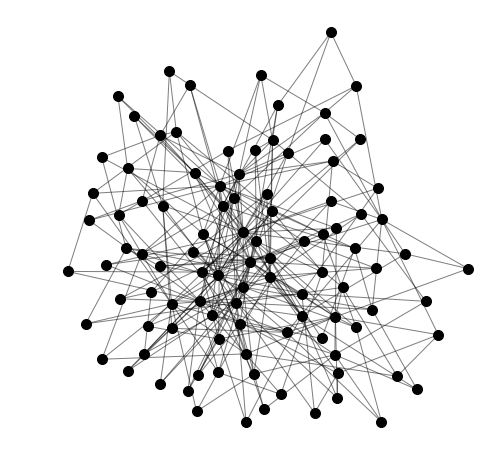

In [3]:
# define number of nodes and average degree.
N = 100
av_degree = 6
m = int(av_degree/2)

# create the barabashi network
GBA = nx.barabasi_albert_graph(N, m)

# plot the network
pos = nx.fruchterman_reingold_layout(GBA);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(GBA, pos, node_size=100, node_color="black");
nx.draw_networkx_edges(GBA, pos, alpha=0.500);
plt.show();

## Fixed Graph Distributed Consensus
### See  DOI: 10.1109/JPROC.2006.887293 

The model is as follows:
    
An undirected graph: $G=(V,E), V=\{1,...,n\},E\subseteq V\times V$ represents the topology of the interacting agents. Hence each $v\in V$
is an agent and each $e\in E$ represents an interaction.

For each agent $i\in V$ we assign an decision parameter $x_{v}\in\mathbb{R}$ representing agent $v$'s decision. From here
we construct $\boldsymbol{x}\in\mathbb{R}^{|V|}=[x_{1},\ldots,x_{|V|}]^{T}$, the decision vector.

We define agreement as the state $x_{1}=x_{2}=\cdots=x_{|V|}$ which is
equivalent to $\boldsymbol{x} = \alpha \boldsymbol{1}$, where $\alpha\in\mathbb{R}, \boldsymbol{1}=[1,1,\ldots,1]^{T}$.

The distributed consensus algorithm, with constant topology, is defined

\begin{align*}
    \dot{\boldsymbol{x}_{i}}(t) = \sum_{j\in N_{i}} \boldsymbol{A}_{i,j}(\boldsymbol{x}_{j}(t)-\boldsymbol{x}_{i}(t))
\end{align*}

where $\boldsymbol{A}$ is the adjacency matrix for $G$, and $N_{i}$ is
the set of neighbours of $i$, that is

\begin{align*}
    N_{i} = \{j\in V : (i,j)\in E\} = \{j\in V : \boldsymbol{A}_{i,j}\neq 0\}
\end{align*}

In fact this algorithm is equivalent to 

\begin{align*}
    \dot{\boldsymbol{x}}(t)=-\boldsymbol{L}\boldsymbol{x}(t)
\end{align*}

and further is equivalent to gradient descent over $\phi(\boldsymbol{x}) = \frac{1}{2}\boldsymbol{x}\boldsymbol{L}\boldsymbol{x}$.

## The Simulation

We construct a *Consensus_Simulation* object with fixed 
graph topology inherent to it's dynamics function.

In [4]:
CS = Consensus.Consensus_Simulation(GBA,
                                    dynamics.distributed,    
                                    nx.laplacian_matrix(GBA).todense())

We may print the disagreement and agreement by

In [5]:
print("Disagreement: ", CS.disagreement())
print("Agreement: ", CS.agreement())

Disagreement:  240917.5
Agreement:  False


And the simulation is run and results plotted as follows

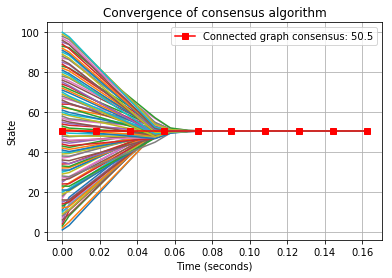

In [6]:
CS.run_sim()
CS.plot()

The connected consensus is the theoretical value for the distributed algorithm, $C = \frac{1}{|V|}\sum_{i}\boldsymbol{x}_{i}(0)$, here by 
default the simulator uses $\boldsymbol{x}(0)=[1,2,3,...,|V|]^{T}$.

To simulate with a random re-wiring of the network we can use the
following.

In [7]:
CS = Consensus.Consensus_Simulation(GBA,
                                    dynamics.distributed_random_topology,    
                                    GBA)

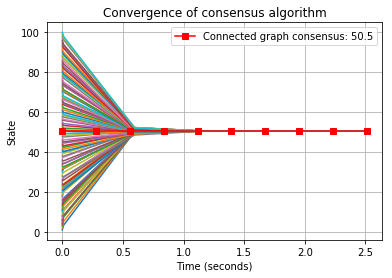

In [8]:
CS.run_sim()
CS.plot()